<a href="https://colab.research.google.com/github/acrobyte007/Stock_Price_Prediction/blob/main/Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/apple_stock_data.csv")

In [ ]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,object


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

In [ ]:
df['Date_ordinal'] = df['Date'].apply(lambda x: x.toordinal())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np


In [ ]:
from sklearn.tree import DecisionTreeRegressor
df['Date_ordinal'] = df['Date'].apply(lambda x: x.toordinal())

# Features (Date_ordinal) and Target (Close prices)
X = df[['Date_ordinal']]
y = df['Close']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting on the test set
y_pred = tree_model.predict(X_test)

# Calculating the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) score: {r2:.2f}")


Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 1.01
R-squared (R²) score: 1.00


In [ ]:
import matplotlib.pyplot as plt

# Function to predict future stock price and plot curve
def predict_and_plot(future_date_str):
    # Convert input future date to ordinal
    future_date = pd.to_datetime(future_date_str).toordinal()

    # Predict future price using the Decision Tree model
    future_price = tree_model.predict(np.array([[future_date]]))

    # Plotting the actual and predicted closing prices
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Close'], label='Historical Closing Prices', color='blue')

    # Plot the predicted price for the future date
    plt.scatter(pd.to_datetime(future_date_str), future_price, color='red', label=f'Predicted Price for {future_date_str}')

    # Labels and title
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Closing Price vs Date')
    plt.legend()


    plt.show()

    # Print the predicted price
    print(f"Predicted future stock price for {future_date_str}: {future_price[0]:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


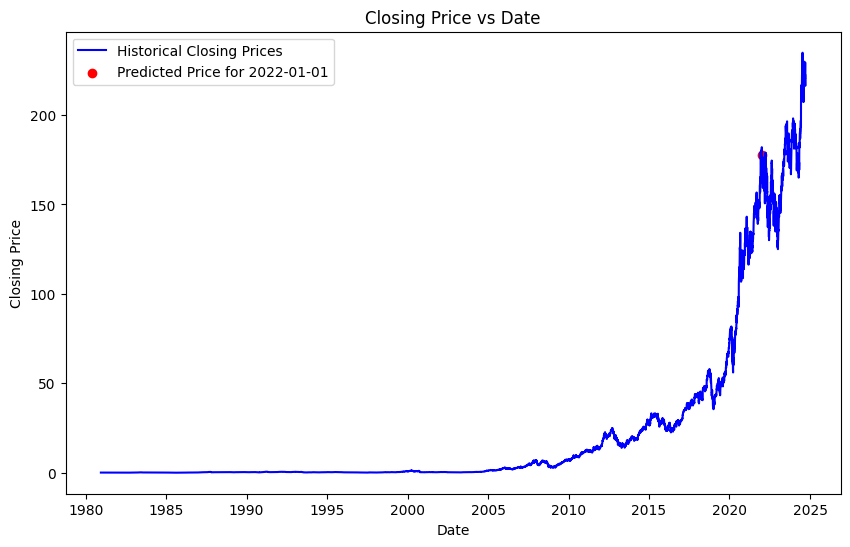

Predicted future stock price for 2022-01-01: 177.57


In [ ]:
predict_and_plot('2022-01-01')


In [ ]:
import pickle

# Save the trained Decision Tree model to a pickle file
with open('tree_model.pkl', 'wb') as file:
    pickle.dump(tree_model, file)


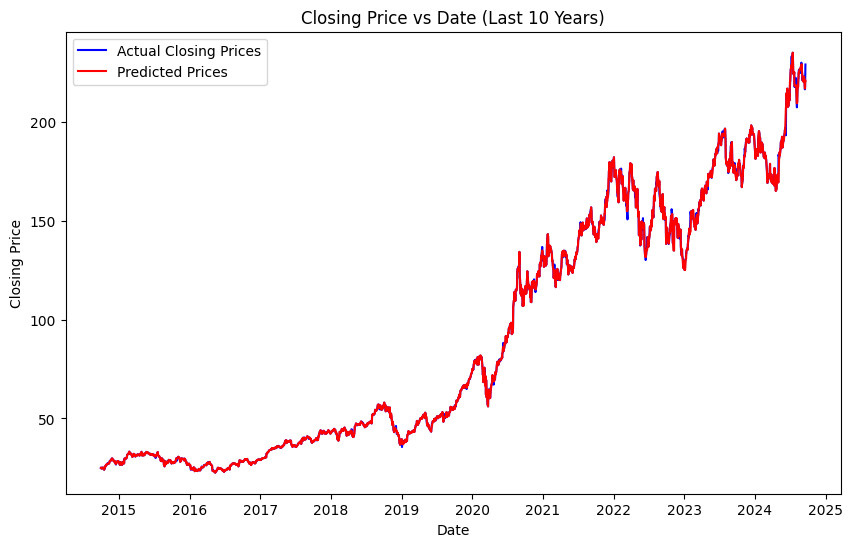

Predicted vs Actual prices for each date saved to predicted_vs_actual_each_date.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to predict stock price for the last 10 years and compare with actual prices
def predict_for_each_date_last_10_years(excel_file_name="predicted_vs_actual_each_date.xlsx"):
    # Filter the last 10 years of data
    end_date = pd.to_datetime('today')  # Or specify an end date if needed
    start_date = end_date - pd.DateOffset(years=10)
    last_10_years_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

    # Predict prices for each date in the last 10 years
    last_10_years_data['Date_ordinal'] = last_10_years_data['Date'].apply(lambda x: x.toordinal())  # Ensure name matches the training set
    predicted_prices = tree_model.predict(last_10_years_data[['Date_ordinal']])  # Match the column name used during fitting

    # Add the predicted prices to the DataFrame
    last_10_years_data['Predicted Price'] = predicted_prices

    # Plotting the actual and predicted closing prices
    plt.figure(figsize=(10, 6))
    plt.plot(last_10_years_data['Date'], last_10_years_data['Close'], label='Actual Closing Prices', color='blue')
    plt.plot(last_10_years_data['Date'], last_10_years_data['Predicted Price'], label='Predicted Prices', color='red')

    # Labels and title
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Closing Price vs Date (Last 10 Years)')
    plt.legend()
    plt.show()

    # Save the comparison to an Excel file
    comparison_df = last_10_years_data[['Date', 'Close', 'Predicted Price']].rename(
        columns={'Close': 'Actual Close Price'}
    )
    comparison_df.to_excel(excel_file_name, index=False)
    print(f"Predicted vs Actual prices for each date saved to {excel_file_name}")

# Example usage
predict_for_each_date_last_10_years('predicted_vs_actual_each_date.xlsx')
